In [ ]:
# default_exp models.binaryClassification
# default_cls_lvl 2

# Binary Horse Poo Model

> Simple model to detect HorsePoo vs noHorsePoo

## export data

In [ ]:
!rm -R data/tmp/horse_poo/ && rm -R data/tmp/no_horse_poo/ 

In [ ]:
!prodigy db-out binary_horse_poo ./data/tmp

✔ Exported 6425 annotations from 'binary_horse_poo' in database
SQLite
/home/wilhelm/PooDetector/data/tmp/binary_horse_poo.jsonl


## convert data

In [ ]:
#export
from PooDetector.dataset_operations import extract_jsonl_to_binary_folders

In [ ]:
extract_jsonl_to_binary_folders('data/tmp/binary_horse_poo.jsonl', 'horse_poo')

## Description
With this model we will start of with a very simple binary classification. We will try to use most of the default settings from fastai. This will also be our benchmark model for further investigations. 

In [ ]:
#export
from fastai.vision import * 
from fastai.callbacks import EarlyStoppingCallback
from prodigy.util import read_jsonl
import os
import shutil
import fire

In [ ]:
#export
def prepare_data(fld_input:str='data/tmp'):
    """function to get a fastai databunch which can be used for training"""
    #tfms = get_transforms(do_flip=False, max_zoom=1, max_warp=None)
    t_tfms = []
    t_tfms.append(flip_lr(p=0.5))
    t_tfms.append(symmetric_warp(magnitude=(-0.2,0.2), p=0.75))
    t_tfms.append(rotate(degrees=(-10,10), p=0.75))
    t_tfms.append(rand_zoom(scale=(1.,1.1), p=0.75))
    t_tfms.append(brightness(change=(0.5*(1-0.2), 0.5*(1+0.2)), p=0.75))
    t_tfms.append(contrast(scale=(1-0.2, 1/(1-0.2)), p=0.75))
    tfms =  (t_tfms , [])
    return (ImageList.from_folder(fld_input)
            .split_by_rand_pct(0.2)         
            .label_from_folder()
            .transform(tfms, size=224)
            .databunch()
            .normalize(imagenet_stats))


In [ ]:
data = prepare_data()

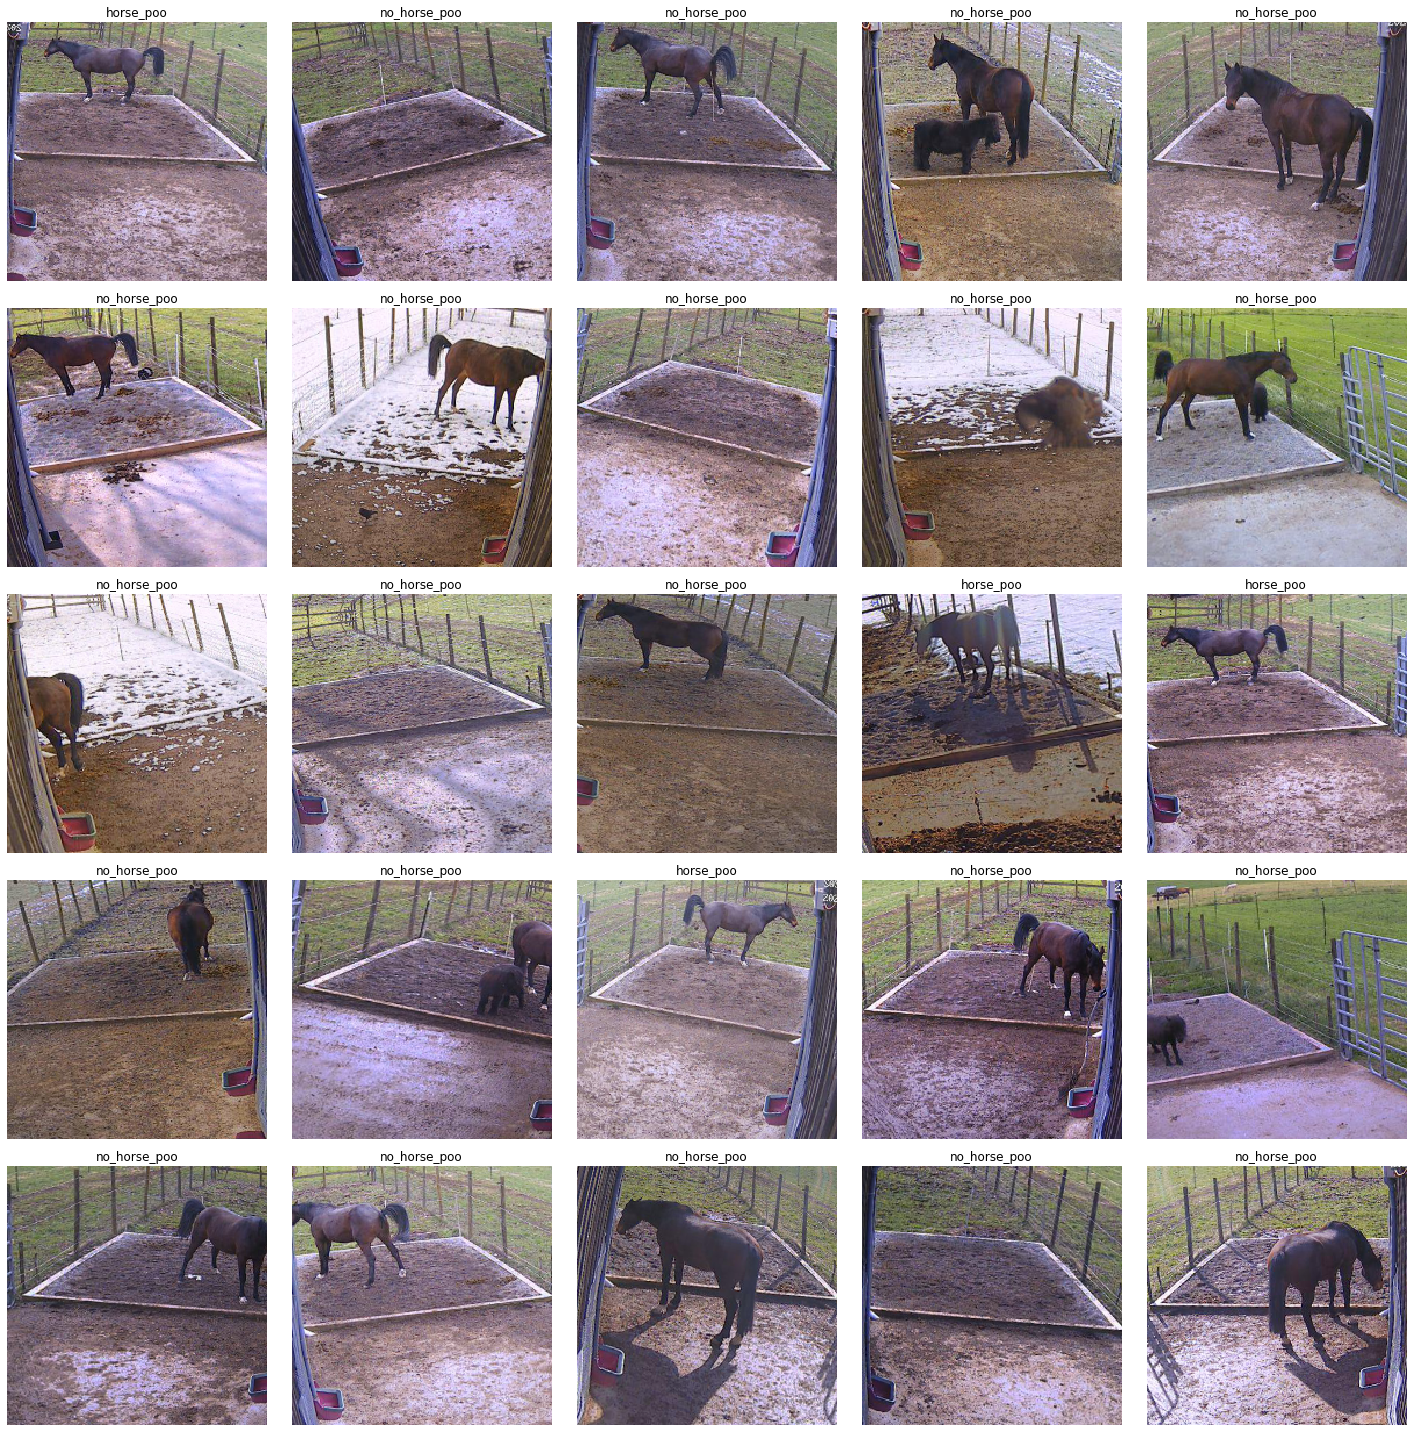

In [ ]:
data.show_batch()

In [ ]:
#export 
def get_learner(data:ImageDataBunch=None, model:Module=None):
    """get a lerner object for training"""
    if data is None:
        data = prepare_data()
    if model is None:
        model = models.resnet50
        
    early_stopping = partial(EarlyStoppingCallback,  min_delta=0.005, patience=5)
    
    return cnn_learner(data, base_arch=model, callback_fns=[early_stopping])

In [ ]:
learn = get_learner()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


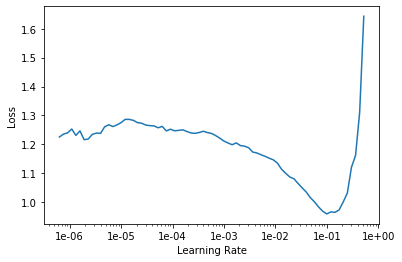

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(6, 5e-2)
#learn.fit_one_cycle(2, 5e-2)
learn.save('stage1')

In [ ]:
learn.load('stage1')
learn.unfreeze()
learn.fit_one_cycle(6, 1e-2)
learn.save('stage2')


In [ ]:
learn.export()

In [ ]:
path_extract_pics = 'data/tmp'
os.path.exists(path_extract_pics)

False

In [ ]:
#export 
def train_model(path_extract_pics = 'data/tmp'):
    """start training a new model with early stopping and export it"""
    if os.path.exists(path_extract_pics) and os.path.isdir(path_extract_pics):
        shutil.rmtree(path_extract_pics)
        
    extract_jsonl_to_binary_folders

In [ ]:
#export
if __name__ == '__main__':
  fire.Fire({
      'extract_jsonl_to_binary_folders': extract_jsonl_to_binary_folders
  })

In [ ]:
image_manual

In [ ]:
from nbdev.export import *
notebook2script()